In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_excel('Uttar Pradesh.xlsx')

In [3]:
df

,Year,Life Expectancy
0,1991,56.8
1,1992,57.5
2,1993,57.9
3,1994,59.1
4,1995,59.2
5,1996,59.4
6,1997,59.7
7,1998,61.3
8,1999,61.5
9,2000,61.9


In [4]:
scaler = MinMaxScaler()
df[['Life Expectancy']] = scaler.fit_transform(df[['Life Expectancy']])

In [5]:
df1 = df[['Year','Life Expectancy']]

In [6]:
df1


,Year,Life Expectancy
0,1991,0.000000
1,1992,0.067308
2,1993,0.105769
3,1994,0.221154
4,1995,0.230769
5,1996,0.250000
6,1997,0.278846
7,1998,0.432692
8,1999,0.451923
9,2000,0.490385


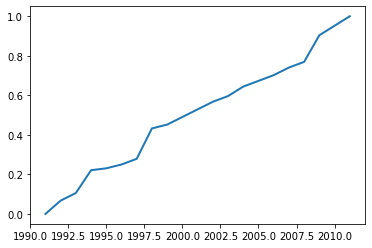

In [7]:
plt.plot(df1['Year'],df1['Life Expectancy'],linewidth=2.0)

In [8]:

X = df1['Year'].values.reshape(-1,1)
y = df1['Life Expectancy'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
dfTest = pd.DataFrame({'Year':[2015,2018,2021,2024]})

In [10]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [11]:
pred

[1.326104554173071, 1.6608197370660491, 2.0912321354844607, 2.6351003575255163]

In [12]:
dfTest['Life Expectancy'] = pred

In [13]:
df1 = df1.append(dfTest,ignore_index=True)

In [14]:
df1

,Year,Life Expectancy
0,1991,0.000000
1,1992,0.067308
2,1993,0.105769
3,1994,0.221154
4,1995,0.230769
5,1996,0.250000
6,1997,0.278846
7,1998,0.432692
8,1999,0.451923
9,2000,0.490385


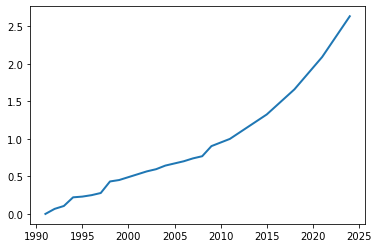

In [15]:
plt.plot(df1['Year'],df1['Life Expectancy'],linewidth=2.0)

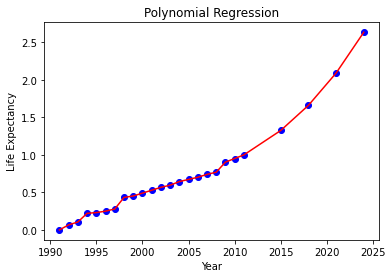

In [16]:
# Visualising the Polynomial Regression results
plt.scatter(df1['Year'], df1['Life Expectancy'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Life Expectancy'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Life Expectancy') 
  
plt.show()

# WRT Unproportioned Scale

In [17]:
pred = []
for i in df1['Life Expectancy']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [18]:
pred

[57.0,
 58.0,
 58.0,
 59.0,
 59.0,
 59.0,
 60.0,
 61.0,
 62.0,
 62.0,
 62.0,
 63.0,
 63.0,
 64.0,
 64.0,
 64.0,
 64.0,
 65.0,
 66.0,
 67.0,
 67.0,
 71.0,
 74.0,
 79.0,
 84.0]

In [19]:
df1['Life Expectancy'] = pred

In [20]:
df1

,Year,Life Expectancy
0,1991,57.0
1,1992,58.0
2,1993,58.0
3,1994,59.0
4,1995,59.0
5,1996,59.0
6,1997,60.0
7,1998,61.0
8,1999,62.0
9,2000,62.0


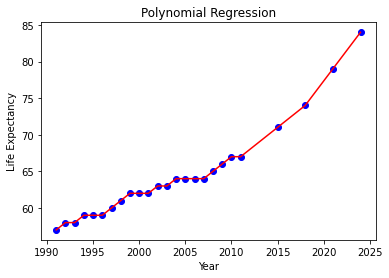

In [21]:
# Visualising the Polynomial Regression results 
plt.scatter(df1['Year'], df1['Life Expectancy'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Life Expectancy'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Life Expectancy') 
  
plt.show() 